# **PROJECT: ENERGY CONSUMPTION AND CO2 EMISSION**

## _1. WORLDS ENERGY CONSUMPTION_


In [18]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\tomas\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


### _1.1 Importing and reviewing_

In [19]:
import mysql.connector

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [12]:
df = pd.read_csv('econsumption.csv')
df

FileNotFoundError: [Errno 2] No such file or directory: 'econsumption.csv'

In [ ]:
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 17432 rows and 122 columns


### _1.2 Filtering_

In [ ]:
df =df [['country','year','electricity_generation','biofuel_electricity','coal_electricity',
'gas_electricity','hydro_electricity','nuclear_electricity','oil_electricity',
'population','gdp','solar_electricity','wind_electricity','energy_per_capita']]

In [ ]:
df =df [(df['year']>=2000) & (df['year']<=2020)]

In [ ]:
countries = ['Germany', 'United Kingdom', 'France','Italy', 'Spain', 'Ukraine', 'Poland', 'Romania', 'Netherlands',
'Belgium', 'Lithuania']
df=df.loc[df['country'].isin(countries)]
df

,country,year,electricity_generation,biofuel_electricity,coal_electricity,gas_electricity,hydro_electricity,nuclear_electricity,oil_electricity,population,gdp,solar_electricity,wind_electricity,energy_per_capita
1663,Belgium,2000,82.773,0.568,12.916,15.977,0.460,48.157,4.679,10282000.0,3.430000e+11,0.000,0.016,73153.564
1664,Belgium,2001,78.618,0.597,9.936,15.780,0.441,46.349,5.478,10319000.0,3.430000e+11,0.000,0.037,72299.813
1665,Belgium,2002,80.939,0.721,10.029,17.868,0.360,47.360,4.544,10365000.0,3.580000e+11,0.000,0.057,71684.098
1666,Belgium,2003,83.561,0.857,9.638,21.609,0.247,47.379,3.743,10419000.0,3.560000e+11,0.000,0.088,74007.258
1667,Belgium,2004,84.352,1.038,9.146,21.477,0.317,47.312,4.920,10480000.0,3.610000e+11,0.001,0.141,73825.921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16244,United Kingdom,2016,334.820,28.651,30.669,143.356,5.394,71.726,7.461,66298000.0,2.580000e+12,10.408,37.155,33577.337
16245,United Kingdom,2017,333.231,30.024,22.530,136.746,5.902,70.336,6.580,66727000.0,NaN,11.475,49.633,33267.134
16246,United Kingdom,2018,328.244,32.870,16.831,131.490,5.490,65.064,6.729,67142000.0,NaN,12.857,56.904,32950.188
16247,United Kingdom,2019,319.515,33.968,6.941,131.276,5.858,57.176,6.788,67530000.0,NaN,12.970,64.527,32249.735


In [ ]:
nulls=df.isna().sum()
nulls

country                    0
year                       0
electricity_generation     0
biofuel_electricity        0
coal_electricity           0
gas_electricity            0
hydro_electricity          0
nuclear_electricity        0
oil_electricity            0
population                11
gdp                       44
solar_electricity          0
wind_electricity           0
energy_per_capita         11
dtype: int64

In [ ]:
nulls=df.isna().sum()
for i in nulls.index:
    if nulls[i]>0:
        df[i].ffill(inplace=True)
        df[i].bfill(inplace=True)
df.isna().sum()

country                   0
year                      0
electricity_generation    0
biofuel_electricity       0
coal_electricity          0
gas_electricity           0
hydro_electricity         0
nuclear_electricity       0
oil_electricity           0
population                0
gdp                       0
solar_electricity         0
wind_electricity          0
energy_per_capita         0
dtype: int64

In [ ]:
df.describe()

,year,electricity_generation,biofuel_electricity,coal_electricity,gas_electricity,hydro_electricity,nuclear_electricity,oil_electricity,population,gdp,solar_electricity,wind_electricity,energy_per_capita
count,231.00000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,2.310000e+02,2.310000e+02,231.000000,231.000000,231.000000
mean,2010.00000,244.159576,7.459264,64.552160,50.322463,17.176697,74.557113,11.368117,4.069271e+07,1.295418e+12,4.391965,13.771433,39639.800879
std,6.06845,192.305789,11.165933,77.155573,48.702344,19.466896,118.390317,14.672016,2.411841e+07,1.056139e+12,9.154771,22.183860,14953.953917
min,2000.00000,2.751000,0.000000,0.000000,0.330000,0.057000,0.000000,0.181000,2.760000e+06,3.885867e+10,0.000000,0.000000,18010.158000
25%,2005.00000,86.602000,0.504000,15.763500,9.954000,0.457000,3.866000,2.632000,1.695950e+07,4.155000e+11,0.002000,0.579000,29144.970500
50%,2010.00000,170.038000,4.221000,31.730000,28.479000,10.374000,46.349000,5.944000,4.471400e+07,8.390000e+11,0.087000,4.615000,36180.182000
75%,2015.00000,335.018500,7.445000,80.144000,79.955500,24.904500,77.974500,16.122500,6.055000e+07,2.125000e+12,3.203500,15.750000,48144.882000
max,2020.00000,647.900000,51.000000,304.700000,176.219000,74.267000,451.529000,93.587000,8.351700e+07,3.920000e+12,51.000000,134.500000,74007.258000


In [ ]:
pip install matplotlib

You should consider upgrading via the 'C:\Users\tomas\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


### _1.3 Calculations_

In [ ]:
df

,country,year,electricity_generation,biofuel_electricity,coal_electricity,gas_electricity,hydro_electricity,nuclear_electricity,oil_electricity,population,gdp,solar_electricity,wind_electricity,energy_per_capita
1663,Belgium,2000,82.773,0.568,12.916,15.977,0.460,48.157,4.679,10282000.0,3.430000e+11,0.000,0.016,73153.564
1664,Belgium,2001,78.618,0.597,9.936,15.780,0.441,46.349,5.478,10319000.0,3.430000e+11,0.000,0.037,72299.813
1665,Belgium,2002,80.939,0.721,10.029,17.868,0.360,47.360,4.544,10365000.0,3.580000e+11,0.000,0.057,71684.098
1666,Belgium,2003,83.561,0.857,9.638,21.609,0.247,47.379,3.743,10419000.0,3.560000e+11,0.000,0.088,74007.258
1667,Belgium,2004,84.352,1.038,9.146,21.477,0.317,47.312,4.920,10480000.0,3.610000e+11,0.001,0.141,73825.921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16244,United Kingdom,2016,334.820,28.651,30.669,143.356,5.394,71.726,7.461,66298000.0,2.580000e+12,10.408,37.155,33577.337
16245,United Kingdom,2017,333.231,30.024,22.530,136.746,5.902,70.336,6.580,66727000.0,2.580000e+12,11.475,49.633,33267.134
16246,United Kingdom,2018,328.244,32.870,16.831,131.490,5.490,65.064,6.729,67142000.0,2.580000e+12,12.857,56.904,32950.188
16247,United Kingdom,2019,319.515,33.968,6.941,131.276,5.858,57.176,6.788,67530000.0,2.580000e+12,12.970,64.527,32249.735


In [ ]:
df['Renewable_en_electricity'] = df.apply(lambda row: row['solar_electricity'] + row['wind_electricity'], axis=1)
df['Fossil_en_electricity'] = df.apply(lambda row: row['coal_electricity'] + row['gas_electricity'] 
+ row['oil_electricity'], axis=1)
df['Alternative_en_electricity'] = df.apply(lambda row: row['hydro_electricity'] + row['biofuel_electricity'], axis=1)
df

,country,year,electricity_generation,biofuel_electricity,coal_electricity,gas_electricity,hydro_electricity,nuclear_electricity,oil_electricity,population,gdp,solar_electricity,wind_electricity,energy_per_capita,Renewable_en_electricity,Fossil_en_electricity,Alternative_en_electricity
1663,Belgium,2000,82.773,0.568,12.916,15.977,0.460,48.157,4.679,10282000.0,3.430000e+11,0.000,0.016,73153.564,0.016,33.572,1.028
1664,Belgium,2001,78.618,0.597,9.936,15.780,0.441,46.349,5.478,10319000.0,3.430000e+11,0.000,0.037,72299.813,0.037,31.194,1.038
1665,Belgium,2002,80.939,0.721,10.029,17.868,0.360,47.360,4.544,10365000.0,3.580000e+11,0.000,0.057,71684.098,0.057,32.441,1.081
1666,Belgium,2003,83.561,0.857,9.638,21.609,0.247,47.379,3.743,10419000.0,3.560000e+11,0.000,0.088,74007.258,0.088,34.990,1.104
1667,Belgium,2004,84.352,1.038,9.146,21.477,0.317,47.312,4.920,10480000.0,3.610000e+11,0.001,0.141,73825.921,0.142,35.543,1.355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16244,United Kingdom,2016,334.820,28.651,30.669,143.356,5.394,71.726,7.461,66298000.0,2.580000e+12,10.408,37.155,33577.337,47.563,181.486,34.045
16245,United Kingdom,2017,333.231,30.024,22.530,136.746,5.902,70.336,6.580,66727000.0,2.580000e+12,11.475,49.633,33267.134,61.108,165.856,35.926
16246,United Kingdom,2018,328.244,32.870,16.831,131.490,5.490,65.064,6.729,67142000.0,2.580000e+12,12.857,56.904,32950.188,69.761,155.050,38.360
16247,United Kingdom,2019,319.515,33.968,6.941,131.276,5.858,57.176,6.788,67530000.0,2.580000e+12,12.970,64.527,32249.735,77.497,145.005,39.826


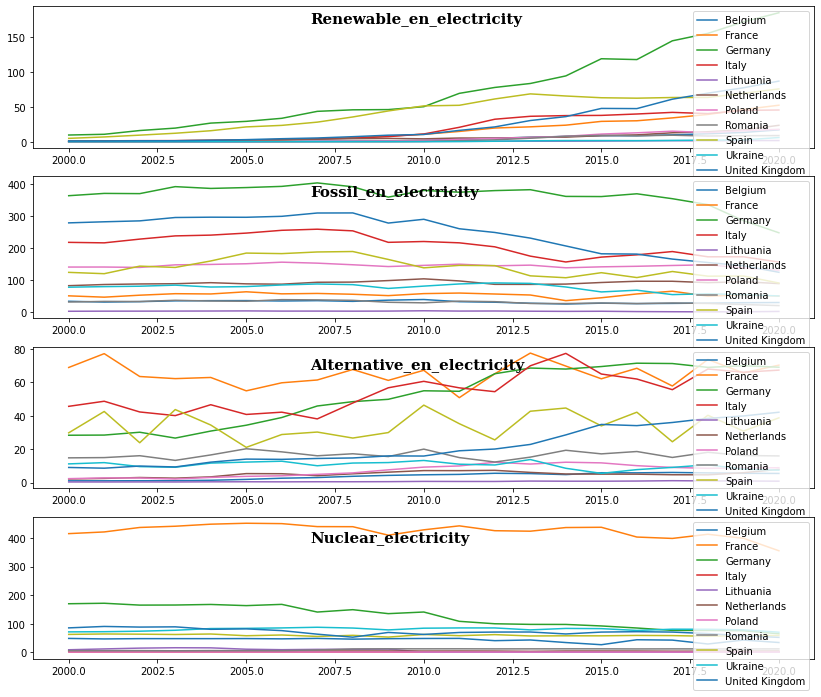

In [ ]:
df_Renewable_en_electricity =df.groupby(['year','country'])['Renewable_en_electricity'].sum().unstack('country')
df_Fossil_en_electricity =df.groupby(['year','country'])['Fossil_en_electricity'].sum().unstack('country')
df_Alternative_en_electricity =df.groupby(['year','country'])['Alternative_en_electricity'].sum().unstack('country')
df_nuclear_electricity =df.groupby(['year','country'])['nuclear_electricity'].sum().unstack('country')
fig, ax = plt.subplots(4, 1, figsize=(14, 12))
ax[0].plot(df_Renewable_en_electricity,label=df_Renewable_en_electricity.columns)
ax[0].legend()
ax[1].plot(df_Fossil_en_electricity,label=df_Fossil_en_electricity.columns)
ax[1].legend()
ax[2].plot(df_Alternative_en_electricity,label=df_Alternative_en_electricity.columns)
ax[2].legend()
ax[3].plot(df_nuclear_electricity,label=df_nuclear_electricity.columns)
ax[3].legend()
fig.text(0.4, 0.86, 'Renewable_en_electricity', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.4, 0.66, 'Fossil_en_electricity', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.4, 0.46, 'Alternative_en_electricity', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.4, 0.26, 'Nuclear_electricity', fontsize=15, fontweight='bold', fontfamily='serif')
plt.show()

In [ ]:
df['Renewable_per_Capita'] = df.apply(lambda row: row['Renewable_en_electricity'] *1000/ row['population'], axis=1)
df['Fossil_per_Capita'] = df.apply(lambda row: row['Fossil_en_electricity'] *1000/ row['population'], axis=1)
df['Alternative_per_Capita'] = df.apply(lambda row: row['Alternative_en_electricity'] *1000/ row['population'], axis=1)
df['Nuclear_per_Capita'] = df.apply(lambda row: row['nuclear_electricity'] *1000/ row['population'], axis=1)
df

,country,year,electricity_generation,biofuel_electricity,coal_electricity,gas_electricity,hydro_electricity,nuclear_electricity,oil_electricity,population,...,solar_electricity,wind_electricity,energy_per_capita,Renewable_en_electricity,Fossil_en_electricity,Alternative_en_electricity,Renewable_per_Capita,Fossil_per_Capita,Alternative_per_Capita,Nuclear_per_Capita
1663,Belgium,2000,82.773,0.568,12.916,15.977,0.460,48.157,4.679,10282000.0,...,0.000,0.016,73153.564,0.016,33.572,1.028,0.000002,0.003265,0.000100,0.004684
1664,Belgium,2001,78.618,0.597,9.936,15.780,0.441,46.349,5.478,10319000.0,...,0.000,0.037,72299.813,0.037,31.194,1.038,0.000004,0.003023,0.000101,0.004492
1665,Belgium,2002,80.939,0.721,10.029,17.868,0.360,47.360,4.544,10365000.0,...,0.000,0.057,71684.098,0.057,32.441,1.081,0.000005,0.003130,0.000104,0.004569
1666,Belgium,2003,83.561,0.857,9.638,21.609,0.247,47.379,3.743,10419000.0,...,0.000,0.088,74007.258,0.088,34.990,1.104,0.000008,0.003358,0.000106,0.004547
1667,Belgium,2004,84.352,1.038,9.146,21.477,0.317,47.312,4.920,10480000.0,...,0.001,0.141,73825.921,0.142,35.543,1.355,0.000014,0.003392,0.000129,0.004515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16244,United Kingdom,2016,334.820,28.651,30.669,143.356,5.394,71.726,7.461,66298000.0,...,10.408,37.155,33577.337,47.563,181.486,34.045,0.000717,0.002737,0.000514,0.001082
16245,United Kingdom,2017,333.231,30.024,22.530,136.746,5.902,70.336,6.580,66727000.0,...,11.475,49.633,33267.134,61.108,165.856,35.926,0.000916,0.002486,0.000538,0.001054
16246,United Kingdom,2018,328.244,32.870,16.831,131.490,5.490,65.064,6.729,67142000.0,...,12.857,56.904,32950.188,69.761,155.050,38.360,0.001039,0.002309,0.000571,0.000969
16247,United Kingdom,2019,319.515,33.968,6.941,131.276,5.858,57.176,6.788,67530000.0,...,12.970,64.527,32249.735,77.497,145.005,39.826,0.001148,0.002147,0.000590,0.000847


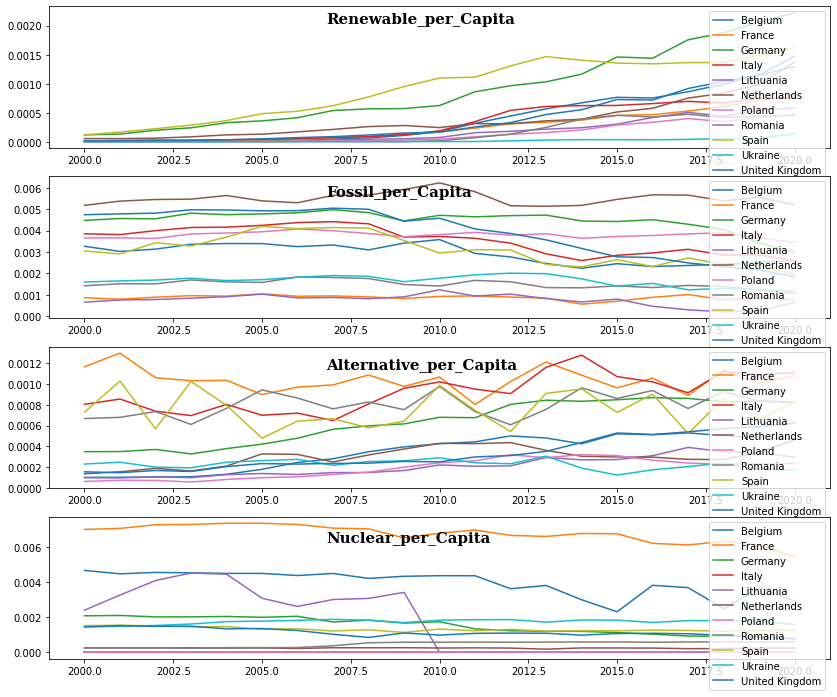

In [ ]:
df_Renewable_per_Capita =df.groupby(['year','country'])['Renewable_per_Capita'].sum().unstack('country')
df_Fossil_per_Capita =df.groupby(['year','country'])['Fossil_per_Capita'].sum().unstack('country')
df_Alternative_per_Capita =df.groupby(['year','country'])['Alternative_per_Capita'].sum().unstack('country')
df_Nuclear_per_Capita =df.groupby(['year','country'])['Nuclear_per_Capita'].sum().unstack('country')
fig, ax = plt.subplots(4, 1, figsize=(14, 12))
ax[0].plot(df_Renewable_per_Capita,label=df_Renewable_per_Capita.columns)
ax[0].legend()
ax[1].plot(df_Fossil_per_Capita,label=df_Fossil_per_Capita.columns)
ax[1].legend()
ax[2].plot(df_Alternative_per_Capita,label=df_Alternative_per_Capita.columns)
ax[2].legend()
ax[3].plot(df_Nuclear_per_Capita,label=df_Nuclear_per_Capita.columns)
ax[3].legend()
fig.text(0.4, 0.86, 'Renewable_per_Capita', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.4, 0.66, 'Fossil_per_Capita', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.4, 0.46, 'Alternative_per_Capita', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.4, 0.26, 'Nuclear_per_Capita', fontsize=15, fontweight='bold', fontfamily='serif')
plt.show()

In [ ]:
df =df [(df['year']==2019)]
df

,country,year,electricity_generation,biofuel_electricity,coal_electricity,gas_electricity,hydro_electricity,nuclear_electricity,oil_electricity,population,...,solar_electricity,wind_electricity,energy_per_capita,Renewable_en_electricity,Fossil_en_electricity,Alternative_en_electricity,Renewable_per_Capita,Fossil_per_Capita,Alternative_per_Capita,Nuclear_per_Capita
1682,Belgium,2019,90.303,5.217,0.091,25.158,0.306,42.417,3.873,11539000.0,...,3.879,9.362,65302.717,13.241,29.122,5.523,0.001147,0.002524,0.000479,0.003676
5744,France,2019,564.970,8.335,4.413,37.588,57.285,398.942,11.631,65130000.0,...,12.569,33.599,41281.299,46.168,53.632,65.620,0.000709,0.000823,0.001008,0.006125
6133,Germany,2019,603.900,50.200,171.500,90.500,19.700,75.100,24.400,83517000.0,...,46.400,125.900,43703.379,172.300,286.400,69.900,0.002063,0.003429,0.000837,0.000899
8049,Italy,2019,290.153,19.125,19.668,137.456,46.877,0.000,15.951,60550000.0,...,24.670,20.319,29239.012,44.989,173.075,66.002,0.000743,0.002858,0.001090,0.000000
8896,Lithuania,2019,3.106,0.568,0.000,0.469,0.353,0.000,0.197,2760000.0,...,0.090,1.428,24641.049,1.518,0.666,0.921,0.000550,0.000241,0.000334,0.000000
10689,Netherlands,2019,121.568,5.798,17.715,71.448,0.074,3.910,5.779,17097000.0,...,5.320,11.523,57046.584,16.843,94.942,5.872,0.000985,0.005553,0.000343,0.000229
12823,Poland,2019,162.627,6.813,118.854,14.530,1.928,0.000,4.738,37888000.0,...,0.725,15.039,31355.418,15.764,138.122,8.741,0.000416,0.003646,0.000231,0.000000
13265,Romania,2019,59.457,0.518,13.606,9.130,15.655,11.279,0.705,19365000.0,...,1.796,6.768,19665.135,8.564,23.441,16.173,0.000442,0.001210,0.000835,0.000582
14572,Spain,2019,271.518,5.882,12.250,84.101,24.909,58.448,16.411,46737000.0,...,15.147,54.369,34004.435,69.516,112.762,30.791,0.001487,0.002413,0.000659,0.001251
16071,Ukraine,2019,142.851,0.285,43.967,8.369,7.687,78.144,1.939,43994000.0,...,0.998,1.462,21501.220,2.460,54.275,7.972,0.000056,0.001234,0.000181,0.001776


In [ ]:
df.to_csv('econsumption_europe')

## **2. CO2 EMISSION**

### _2.1 Importing and reviewing_

In [2]:
import pandas as pd
import mysql.connector
mydb = mysql.connector.connect (
    host = "localhost",
    port = "3317",
    user = "root",
    auth_plugin="mysql_native_password",
    password ="Iagtprr365830",
    )
cursor = mydb.cursor()
cursor.execute ("USE projektas")
emission =pd.read_sql("SELECT * FROM energy", con=mydb)
emission

C:\Users\tomas\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,MyUnknownColumn,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
0,0,World,all_energy_types,1980,292.899790,296.337228,27770.910281,4.298127e+06,68.145921,10.547000,4946.627130
1,1,World,coal,1980,78.656134,80.114194,27770.910281,4.298127e+06,68.145921,10.547000,1409.790188
2,2,World,natural_gas,1980,53.865223,54.761046,27770.910281,4.298127e+06,68.145921,10.547000,1081.593377
3,3,World,petroleum_n_other_liquids,1980,132.064019,133.111109,27770.910281,4.298127e+06,68.145921,10.547000,2455.243565
4,4,World,nuclear,1980,7.575700,7.575700,27770.910281,4.298127e+06,68.145921,10.547000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
55435,55435,Zimbabwe,coal,2019,0.045064,0.075963,37.620400,1.465420e+04,11.508701,4.482962,4.586869
55436,55436,Zimbabwe,natural_gas,2019,0.000000,0.000000,37.620400,1.465420e+04,11.508701,4.482962,0.000000
55437,55437,Zimbabwe,petroleum_n_other_liquids,2019,0.055498,0.000000,37.620400,1.465420e+04,11.508701,4.482962,4.377890
55438,55438,Zimbabwe,nuclear,2019,0.000000,0.000000,37.620400,1.465420e+04,11.508701,4.482962,0.000000


In [3]:
emission.head(15)

,MyUnknownColumn,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
0,0,World,all_energy_types,1980,292.899790,296.337228,27770.910281,4.298127e+06,68.145921,10.547,4946.627130
1,1,World,coal,1980,78.656134,80.114194,27770.910281,4.298127e+06,68.145921,10.547,1409.790188
2,2,World,natural_gas,1980,53.865223,54.761046,27770.910281,4.298127e+06,68.145921,10.547,1081.593377
3,3,World,petroleum_n_other_liquids,1980,132.064019,133.111109,27770.910281,4.298127e+06,68.145921,10.547,2455.243565
4,4,World,nuclear,1980,7.575700,7.575700,27770.910281,4.298127e+06,68.145921,10.547,0.000000
5,5,World,renewables_n_other,1980,20.702344,20.775178,27770.910281,4.298127e+06,68.145921,10.547,0.000000
6,6,Afghanistan,all_energy_types,1980,0.026583,0.072561,0.000000,1.335650e+04,1.990283,0.000,0.000000
7,7,Afghanistan,coal,1980,0.002479,0.002355,0.000000,1.335650e+04,1.990283,0.000,0.000000
8,8,Afghanistan,natural_gas,1980,0.002094,0.062820,0.000000,1.335650e+04,1.990283,0.000,0.000000
9,9,Afghanistan,petroleum_n_other_liquids,1980,0.014624,0.000000,0.000000,1.335650e+04,1.990283,0.000,0.000000


In [4]:
nRow, nCol = emission.shape
print(emission'There are {nRow} rows and {nCol} columns')

SyntaxError: invalid syntax (1019955456.py, line 2)

In [5]:
emission =emission [['Country','Energy_type','Year','CO2_emission']]

In [6]:
emission

,Country,Energy_type,Year,CO2_emission
0,World,all_energy_types,1980,4946.627130
1,World,coal,1980,1409.790188
2,World,natural_gas,1980,1081.593377
3,World,petroleum_n_other_liquids,1980,2455.243565
4,World,nuclear,1980,0.000000
...,...,...,...,...
55435,Zimbabwe,coal,2019,4.586869
55436,Zimbabwe,natural_gas,2019,0.000000
55437,Zimbabwe,petroleum_n_other_liquids,2019,4.377890
55438,Zimbabwe,nuclear,2019,0.000000


In [7]:
emission =emission [(emission['Year']==2019)]

In [8]:
emission

,Country,Energy_type,Year,CO2_emission
54054,World,all_energy_types,2019,35584.933498
54055,World,coal,2019,15773.074341
54056,World,natural_gas,2019,7607.936618
54057,World,petroleum_n_other_liquids,2019,12203.922539
54058,World,nuclear,2019,0.000000
...,...,...,...,...
55435,Zimbabwe,coal,2019,4.586869
55436,Zimbabwe,natural_gas,2019,0.000000
55437,Zimbabwe,petroleum_n_other_liquids,2019,4.377890
55438,Zimbabwe,nuclear,2019,0.000000


In [10]:
emission =emission [(emission['Energy_type']=='all_energy_types')]

In [11]:
emission

,Country,Energy_type,Year,CO2_emission
54054,World,all_energy_types,2019,35584.933498
54060,Afghanistan,all_energy_types,2019,9.391163
54066,Albania,all_energy_types,2019,4.031302
54072,Algeria,all_energy_types,2019,145.987969
54078,American Samoa,all_energy_types,2019,0.355428
...,...,...,...,...
55410,Wake Island,all_energy_types,2019,1.273787
55416,Western Sahara,all_energy_types,2019,0.263038
55422,Yemen,all_energy_types,2019,8.292505
55428,Zambia,all_energy_types,2019,7.096290


In [13]:
countries = ['Germany', 'United Kingdom', 'France','Italy', 'Spain', 'Ukraine', 'Poland', 'Romania', 'Netherlands',
'Belgium', 'Lithuania']
emission=emission.loc[emission['Country'].isin(countries)]
emission

,Country,Energy_type,Year,CO2_emission
54162,Belgium,all_energy_types,2019,132.279625
54492,France,all_energy_types,2019,341.980654
54528,Germany,all_energy_types,2019,781.596225
54684,Italy,all_energy_types,2019,339.577060
54780,Lithuania,all_energy_types,2019,14.255079
54918,Netherlands,all_energy_types,2019,216.830355
55038,Poland,all_energy_types,2019,319.670314
55068,Romania,all_energy_types,2019,73.684119
55206,Spain,all_energy_types,2019,293.779474
55356,Ukraine,all_energy_types,2019,202.513341


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

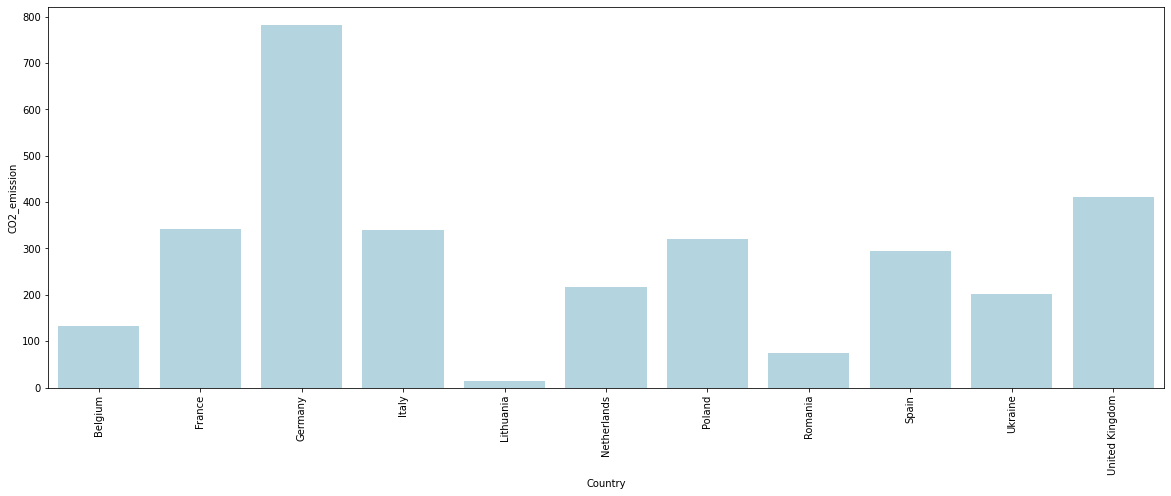

In [19]:
plt.figure(figsize=(20,7))
sns.barplot(data=emission,x="Country",y="CO2_emission", color='lightblue')
plt.xticks(rotation=90)
plt.show()

In [20]:
emission

,Country,Energy_type,Year,CO2_emission
54162,Belgium,all_energy_types,2019,132.279625
54492,France,all_energy_types,2019,341.980654
54528,Germany,all_energy_types,2019,781.596225
54684,Italy,all_energy_types,2019,339.577060
54780,Lithuania,all_energy_types,2019,14.255079
54918,Netherlands,all_energy_types,2019,216.830355
55038,Poland,all_energy_types,2019,319.670314
55068,Romania,all_energy_types,2019,73.684119
55206,Spain,all_energy_types,2019,293.779474
55356,Ukraine,all_energy_types,2019,202.513341


In [22]:
df2 = pd.read_csv('econsumption_europe.csv')
df2

FileNotFoundError: [Errno 2] No such file or directory: 'econsumption_europe.csv'